# K-Means Clustering

## Pengertian K-Means

**K-Means Clustering** adalah salah satu algoritma unsupervised learning yang digunakan untuk membagi data ke dalam kelompok (cluster) berdasarkan kemiripan fitur. Algoritma ini bekerja dengan mengelompokkan data ke dalam **k** cluster yang berbeda, di mana setiap data point akan termasuk dalam cluster dengan centroid terdekat.

**Proses K-Means:**

$\textbf{Inisialisasi centroid}$: Pilih titik acak sebagai $\textit{centroid}$ awal

$\textbf{Assign data points}$: Alokasikan tiap data point ke $\textit{centroid}$ terdekat (jarak Euclidean)

$\textbf{Update centroid}$: Hitung ulang $\textit{centroid}$ sebagai rata-rata data dalam cluster

$\textbf{Iterasi}$: Ulangi hingga konvergen


---

## Cara Kerja K-Means

1. **Menentukan Jumlah Cluster (K):**  
    Tentukan jumlah cluster yang diinginkan sesuai dengan kebutuhan analisis.  

2. **Inisialisasi Centroid:**  
    Pilih secara acak K titik awal sebagai centroid (pusat cluster).  

3. **Mengelompokkan Data ke Centroid Terdekat:**  
    - Hitung jarak setiap data ke masing-masing centroid (biasanya menggunakan jarak Euclidean).  
    - Kelompokkan data ke cluster dengan centroid terdekat.  

4. **Memperbarui Centroid:**  
    Hitung rata-rata posisi dari semua data dalam setiap cluster, lalu jadikan hasilnya sebagai centroid baru.  

5. **Iterasi:**  
    Ulangi langkah 3 dan 4 hingga salah satu kondisi berikut tercapai:  
    - Centroid tidak mengalami perubahan signifikan.  
    - Jumlah iterasi maksimum telah tercapai.  

---

## Keunggulan dan Kelemahan

**Keunggulan K-Means:**  
- Cepat dan efisien untuk data besar.  
- Mudah diimplementasikan.  
- Cocok untuk data numerik.  

**Kelemahan K-Means:**
- Harus menentukan K terlebih dahulu (bisa menggunakan Elbow Method atau Silhouette Analysis).  
- Sensitif terhadap centroid awal (solusi: K-Means++).  
- Tidak cocok untuk data kategorikal atau cluster yang tidak berbentuk bulat (non-globular).  

---

## Contoh Penerapan
- Segmentasi pelanggan berdasarkan perilaku belanja.  
- Pengelompokan dokumen berdasarkan topik.  
- Analisis citra (segmentasi warna).  


### Notasi Matematis:

$\text{Dataset } \mathcal{X} = \{\mathbf{x}_1, \mathbf{x}_2, ..., \mathbf{x}_n\}, \quad \mathbf{x}_i \in \mathbb{R}^d$

$\text{Tujuan: Minimalkan SSE atau Inertia } \\ J = \sum_{j=1}^k \sum_{\mathbf{x}_i \in C_j} \|\mathbf{x}_i - \boldsymbol{\mu}_j\|^2$


<br>

dengan:

$\begin{array}{ll}
C_j & \text{= cluster ke-}j \\
\boldsymbol{\mu}_j & \text{= centroid cluster } C_j \\
\|\mathbf{x}_i - \boldsymbol{\mu}_j\| & \text{= norma Euclidean}
\end{array}$


## Implementasi K-Means Menggunakan Dataset Iris

### Persiapan Data

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from tabulate import tabulate

In [18]:
# Load data
data = pd.read_csv('./property/default_iris_combined.csv')

# Hapus kolom id dan class
X = data.drop(['id', 'class'], axis=1)

# Standarisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Data setelah Standarisasi:")
print(pd.DataFrame(X_scaled, columns=X.columns).head())

Data setelah Standarisasi:
   petal length  petal width  sepal length  sepal width
0     -1.341272    -1.312977     -0.900681     1.032057
1     -1.341272    -1.312977     -1.143017    -0.124958
2     -1.398138    -1.312977     -1.385353     0.337848
3     -1.284407    -1.312977     -1.506521     0.106445
4     -1.341272    -1.312977     -1.021849     1.263460


**Penjelasan:**

- Kita memuat dataset Iris dan menghapus kolom 'id' dan 'class' karena tidak diperlukan untuk klastering.

- Data kemudian distandardisasi menggunakan StandardScaler untuk memastikan semua fitur memiliki skala yang sama.

### Menentukan Jumlah Klaster Optimal
Metode Elbow

In [7]:
# Inisialisasi list untuk menyimpan metrik
sse = []
silhouette_scores = []
k_values = range(2, 5)  # k=2,3,4

# Hitung SSE dan Silhouette untuk setiap k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)

    sse.append(kmeans.inertia_)  # SSE (Inertia)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Tampilkan dalam tabel
metrics_table = pd.DataFrame({
    'Number of Clusters (k)': k_values,
    'SSE (Inertia)': sse,
    'Silhouette Score': silhouette_scores
})

print("\nPerbandingan Metrik Klastering:")
print(tabulate(metrics_table, headers='keys', tablefmt='grid', showindex=False))


Perbandingan Metrik Klastering:
+--------------------------+-----------------+--------------------+
|   Number of Clusters (k) |   SSE (Inertia) |   Silhouette Score |
+==========================+=================+====================+
|                        2 |         223.732 |           0.580184 |
+--------------------------+-----------------+--------------------+
|                        3 |         140.966 |           0.458972 |
+--------------------------+-----------------+--------------------+
|                        4 |         114.618 |           0.385285 |
+--------------------------+-----------------+--------------------+


**Penjelasan:**

- SSE (Sum of Squared Errors) menurun saat k meningkat (**k=2** memiliki SSE tertinggi, **k=4** terendah).

- Silhouette Score tertinggi pada **k=2** (0.52), menurun saat k bertambah.

- **k=3** mungkin optimal karena SSE turun signifikan dibanding **k=2**, tetapi Silhouette masih baik (~0.46).

### Visualisasi Metode Elbow

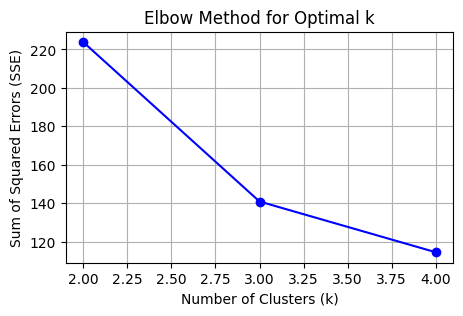

In [21]:
plt.figure(figsize=(5, 3))
plt.plot(k_values, sse, marker='o', color='b')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

- "Elbow" (titik siku) terlihat di **k=3**, di mana penurunan SSE mulai melambat.

- **k=3** adalah kandidat terbaik untuk jumlah klaster.

### Visualisasi Klaster Terbaik

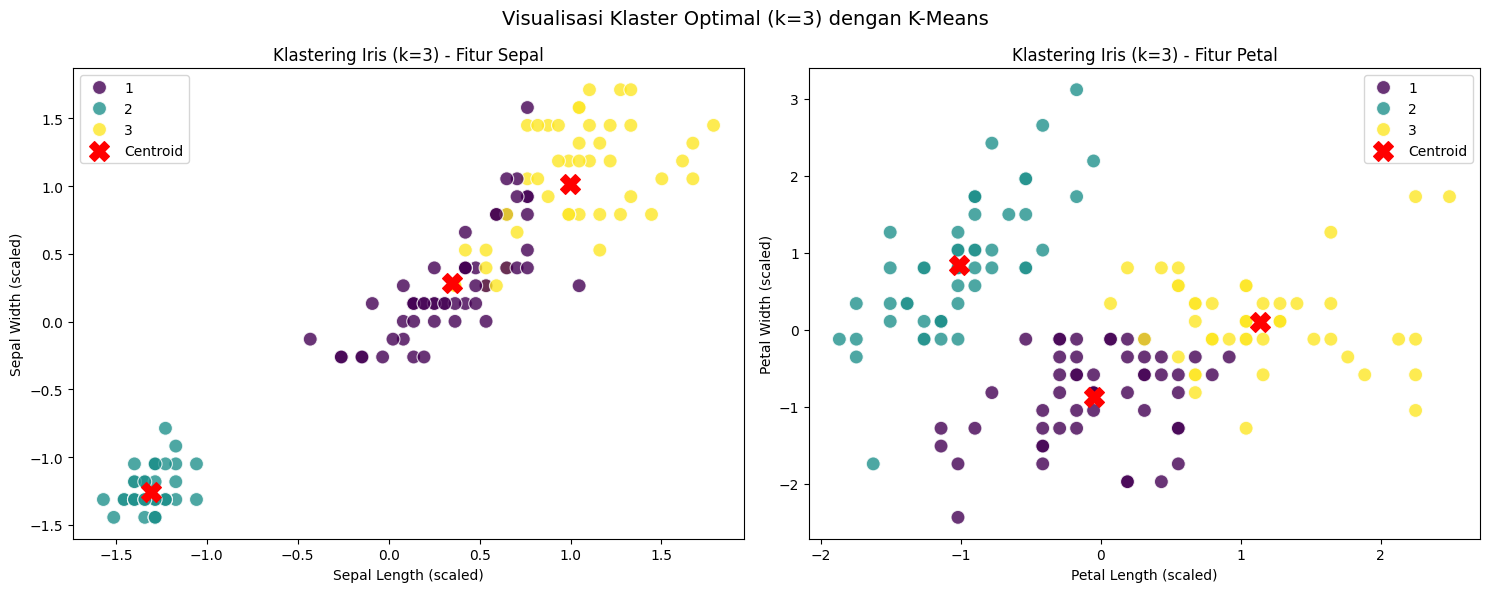

In [13]:
import seaborn as sns

# 1. Klastering dengan k=3
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(X_scaled)
clusters = kmeans.labels_ + 1

# 2. Visualisasi 2 Pasang Fitur (Sepal vs Petal)
plt.figure(figsize=(15, 6))

# --- Plot 1: Sepal Length vs Sepal Width ---
plt.subplot(1, 2, 1)
sns.scatterplot(
    x=X_scaled[:, 0], y=X_scaled[:, 1],
    hue=clusters, palette="viridis", s=100, alpha=0.8
)
plt.scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
    s=200, marker="X", c="red", label="Centroid"
)
plt.xlabel("Sepal Length (scaled)")
plt.ylabel("Sepal Width (scaled)")
plt.title("Klastering Iris (k=3) - Fitur Sepal")
plt.legend()

# --- Plot 2: Petal Length vs Petal Width ---
plt.subplot(1, 2, 2)
sns.scatterplot(
    x=X_scaled[:, 2], y=X_scaled[:, 3],
    hue=clusters, palette="viridis", s=100, alpha=0.8
)
plt.scatter(
    kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 3],
    s=200, marker="X", c="red", label="Centroid"
)
plt.xlabel("Petal Length (scaled)")
plt.ylabel("Petal Width (scaled)")
plt.title("Klastering Iris (k=3) - Fitur Petal")
plt.legend()

plt.suptitle("Visualisasi Klaster Optimal (k=3) dengan K-Means", fontsize=14)
plt.tight_layout()
plt.show()